# SML Exercise – logistic classifier training and evaluation

In [1]:
# Imports:
import turicreate as tc
import re
#import log_reg_utils.py as lru

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 1) Copy all of the functions you wrote for ‘Exercise – coding logistic regression’ into a text file named ‘log_reg_utils.py’. 
# Upload the file into the same folder as your notebook for this exercise. Import log_reg_utils.py into the notebook as ‘lru’.
import log_reg_utils as lru

In [3]:
# 2) Write a function called ‘clean’ that uses the ‘re’ library according to the following pseudocode:
# Input: a string
# Output: a cleaned string
# Procedure:
#  · Remove digits
#  · Remove html tags
#  · Remove punctuation
#  · Lower case
#  · Output the cleaned string

def clean(sample):
    sample = re.sub('\d', '', sample)
    sample = re.sub('<.{1,4}>', ' ', sample)
    sample = re.sub('[^\w\s]', ' ', sample)
    sample = sample.lower()
    return sample

In [4]:
# 3) Write a function called ‘count_words’ according to the following pseudocode:
# Input: a list of words words
# Output: a list of counts [bc, fc, zc]
# Procedure:
#  · Initialize bc = 0, fc = 0, zc = 0
#  · For word in words:
#     · If word == ‘blip’, bc +=1
#     · If word == ‘florp’, fc +=1
#     · If word == ‘zorg’, zc +=1
#  · Return the list [bc, fc, zc]

def count_words(words):
    bc = 0
    fc = 0
    zc = 0
    for word in words:
        if word == 'blip': bc+=1
        if word == 'florp': fc += 1
        if word == 'zorg': zc += 1
    return [bc, fc, zc]

In [5]:
# 4) Prepare data for input:
# Hardcode the data
# Use your clean() function to clean your data.
# Use the string method split() to tokenize each sentence.
# Use your count_word() function to obtain an input vector for each sample.

data = ['Zorg florp! blip florp^2 zOrg florp',
'Blip (florP zOrg) florp zorg 37 florp zorg florp!?!',
'Blip zorg florp [blip] florp zOrg blip zorg florp',
'Florp zorg bLip florp zOrg florp zorg florp zorg florp',
'Zorg, florp blip florp zOrg florp zorg Zorg <br> florp zOrg florp',
'Blip florp. zorg florp zOrg florp zorg blip zOrg',
'Zorg florp blip <br> floRp zOrg florp zorg florp zorg florp zOrg florp',
'Blip florp 5 zOrg florp zorg florp *zOrg* florp zorg florp zorg florp',
'Florp blip florp zOrg? florp zorg florp 0.11 Zorg florp zOrg florp zorg',
'Blip zorg florp zorg “FLorp zOrg florp ZORg” -- florp zOrg florp zorg floRP.']
Y = np.array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])


cleaned_data = [clean(sample) for sample in data]
tokens = [sentence.split() for sentence in cleaned_data]
input_vectors = np.array([count_words(word_list) for word_list in tokens])
#input_vectors

In [6]:
# 5) Train a logistic classifier using the logistic_regression function in your log_reg_utils.py file and save the weights and bias (you won’t need the errors).

w, b, _ = lru.logistic_regression(input_vectors, Y)

In [7]:
# 6) Use your logistic classifier and the ‘sigmoid’ function to obtain a list of probabilities P, one for each sample.


P = np.array([lru.sigmoid(np.dot(vector, w) + b) for vector in input_vectors])

In [8]:
# 7) Write a function called ‘predict’ according to the following pseudocode:
# Input: a list of probabilities P, a threshold with default value 𝑡=0.5
# Output: a list Y_hat of predictions (0 or 1)
# Procedure:
#  · Create an empty list Y_hat
#  · For each p in P:
#     · If 𝑝≥𝑡 append 1 to Y_hat
#     · Otherwise, append 0 to Y_hat
#  · Return the list Y_hat

def predict(P, t=0.5):
    Y_hat = []
    for p in P:
        if p >= t: Y_hat.append(1)
        else: Y_hat.append(0)
    return Y_hat

In [9]:
# 8) Write a function called ‘roc_point’ according to the following pseudocode:
# Input: a list of predictions Y_hat, a list of labels Y
# Output: sensitivity and specificity
# Procedure:
#  · Find the number of TP, FP, TN, FN
#  · Calculate and return the sensitivity and specificity

def roc_point(Y_hat, Y):
    TP = sum(1 for yh, y in zip(Y_hat, Y) if yh == 1 and y == 1)
    FP = sum(1 for yh, y in zip(Y_hat, Y) if yh == 1 and y == 0)
    TN = sum(1 for yh, y in zip(Y_hat, Y) if yh == 0 and y == 0)
    FN = sum(1 for yh, y in zip(Y_hat, Y) if yh == 0 and y == 1) 

    sensitivity = TP / (TP + TN) if (TP + TN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    return sensitivity, specificity

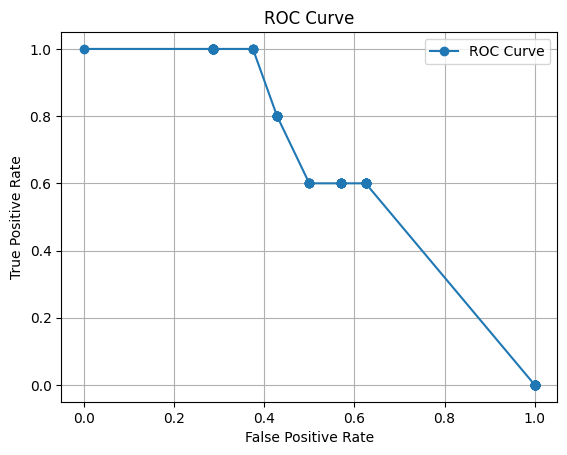

In [10]:
# 9) Plot the ROC curve by doing the following:
# Create empty lists x_roc and y_roc.
# For t in np.linspace(0,1,101):
#  · Use predict() to obtain a list of predictions Y_hat
#  · Use roc_point() to obtain the sensitivity and specificity
#  · Append the sensitivity to x_roc, append the specificity to y_roc
# Use matplotlib to create the roc_curve from x_roc and y_roc. Give the plot a title and label the axes.

x_roc = []
y_roc = []

for t in np.linspace(0, 1, 101):
    Y_hat = predict(P, t)
    sensitivity, specificity = roc_point(Y_hat, Y)
    x_roc.append(sensitivity)
    y_roc.append(specificity)

plt.plot(x_roc, y_roc, marker = 'o', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()